In [1]:
%matplotlib widget
import spectral as spy
import spectral.io.envi as envi

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import japanize_matplotlib

from PIL import Image
import csv
import mplcursors

from scipy.signal import argrelmax

In [2]:
HDR_PATH_iphone = '/data/iphone_green_200_stegano_2023-08-07_015/results/REFLECTANCE_2023-08-07_015.hdr'
HDR_PATH_pixel = '/data/pixel_green_200_stegano_2023-08-07_016/results/REFLECTANCE_2023-08-07_016.hdr'
HDR_PATH_huawei = '/data/huawei_green_200_stegano_2023-08-07_018/results/REFLECTANCE_2023-08-07_018.hdr'

IMG_PATH_iphone = '/data/iphone_green_200_stegano_2023-08-07_015/results/REFLECTANCE_2023-08-07_015.png'
IMG_PATH_pixel = '/data/pixel_green_200_stegano_2023-08-07_016/results/REFLECTANCE_2023-08-07_016.png'
IMG_PATH_huawei = '/data/huawei_green_200_stegano_2023-08-07_018/results/REFLECTANCE_2023-08-07_018.png'

In [3]:
spec_img_i = envi.open(HDR_PATH_iphone)
spec_img_p = envi.open(HDR_PATH_pixel)
spec_img_h = envi.open(HDR_PATH_huawei)

In [4]:
wave_lengthes = []
hdr = envi.read_envi_header(HDR_PATH_iphone)

for wl in hdr['wavelength']:
    wave_lengthes.append(float(wl))

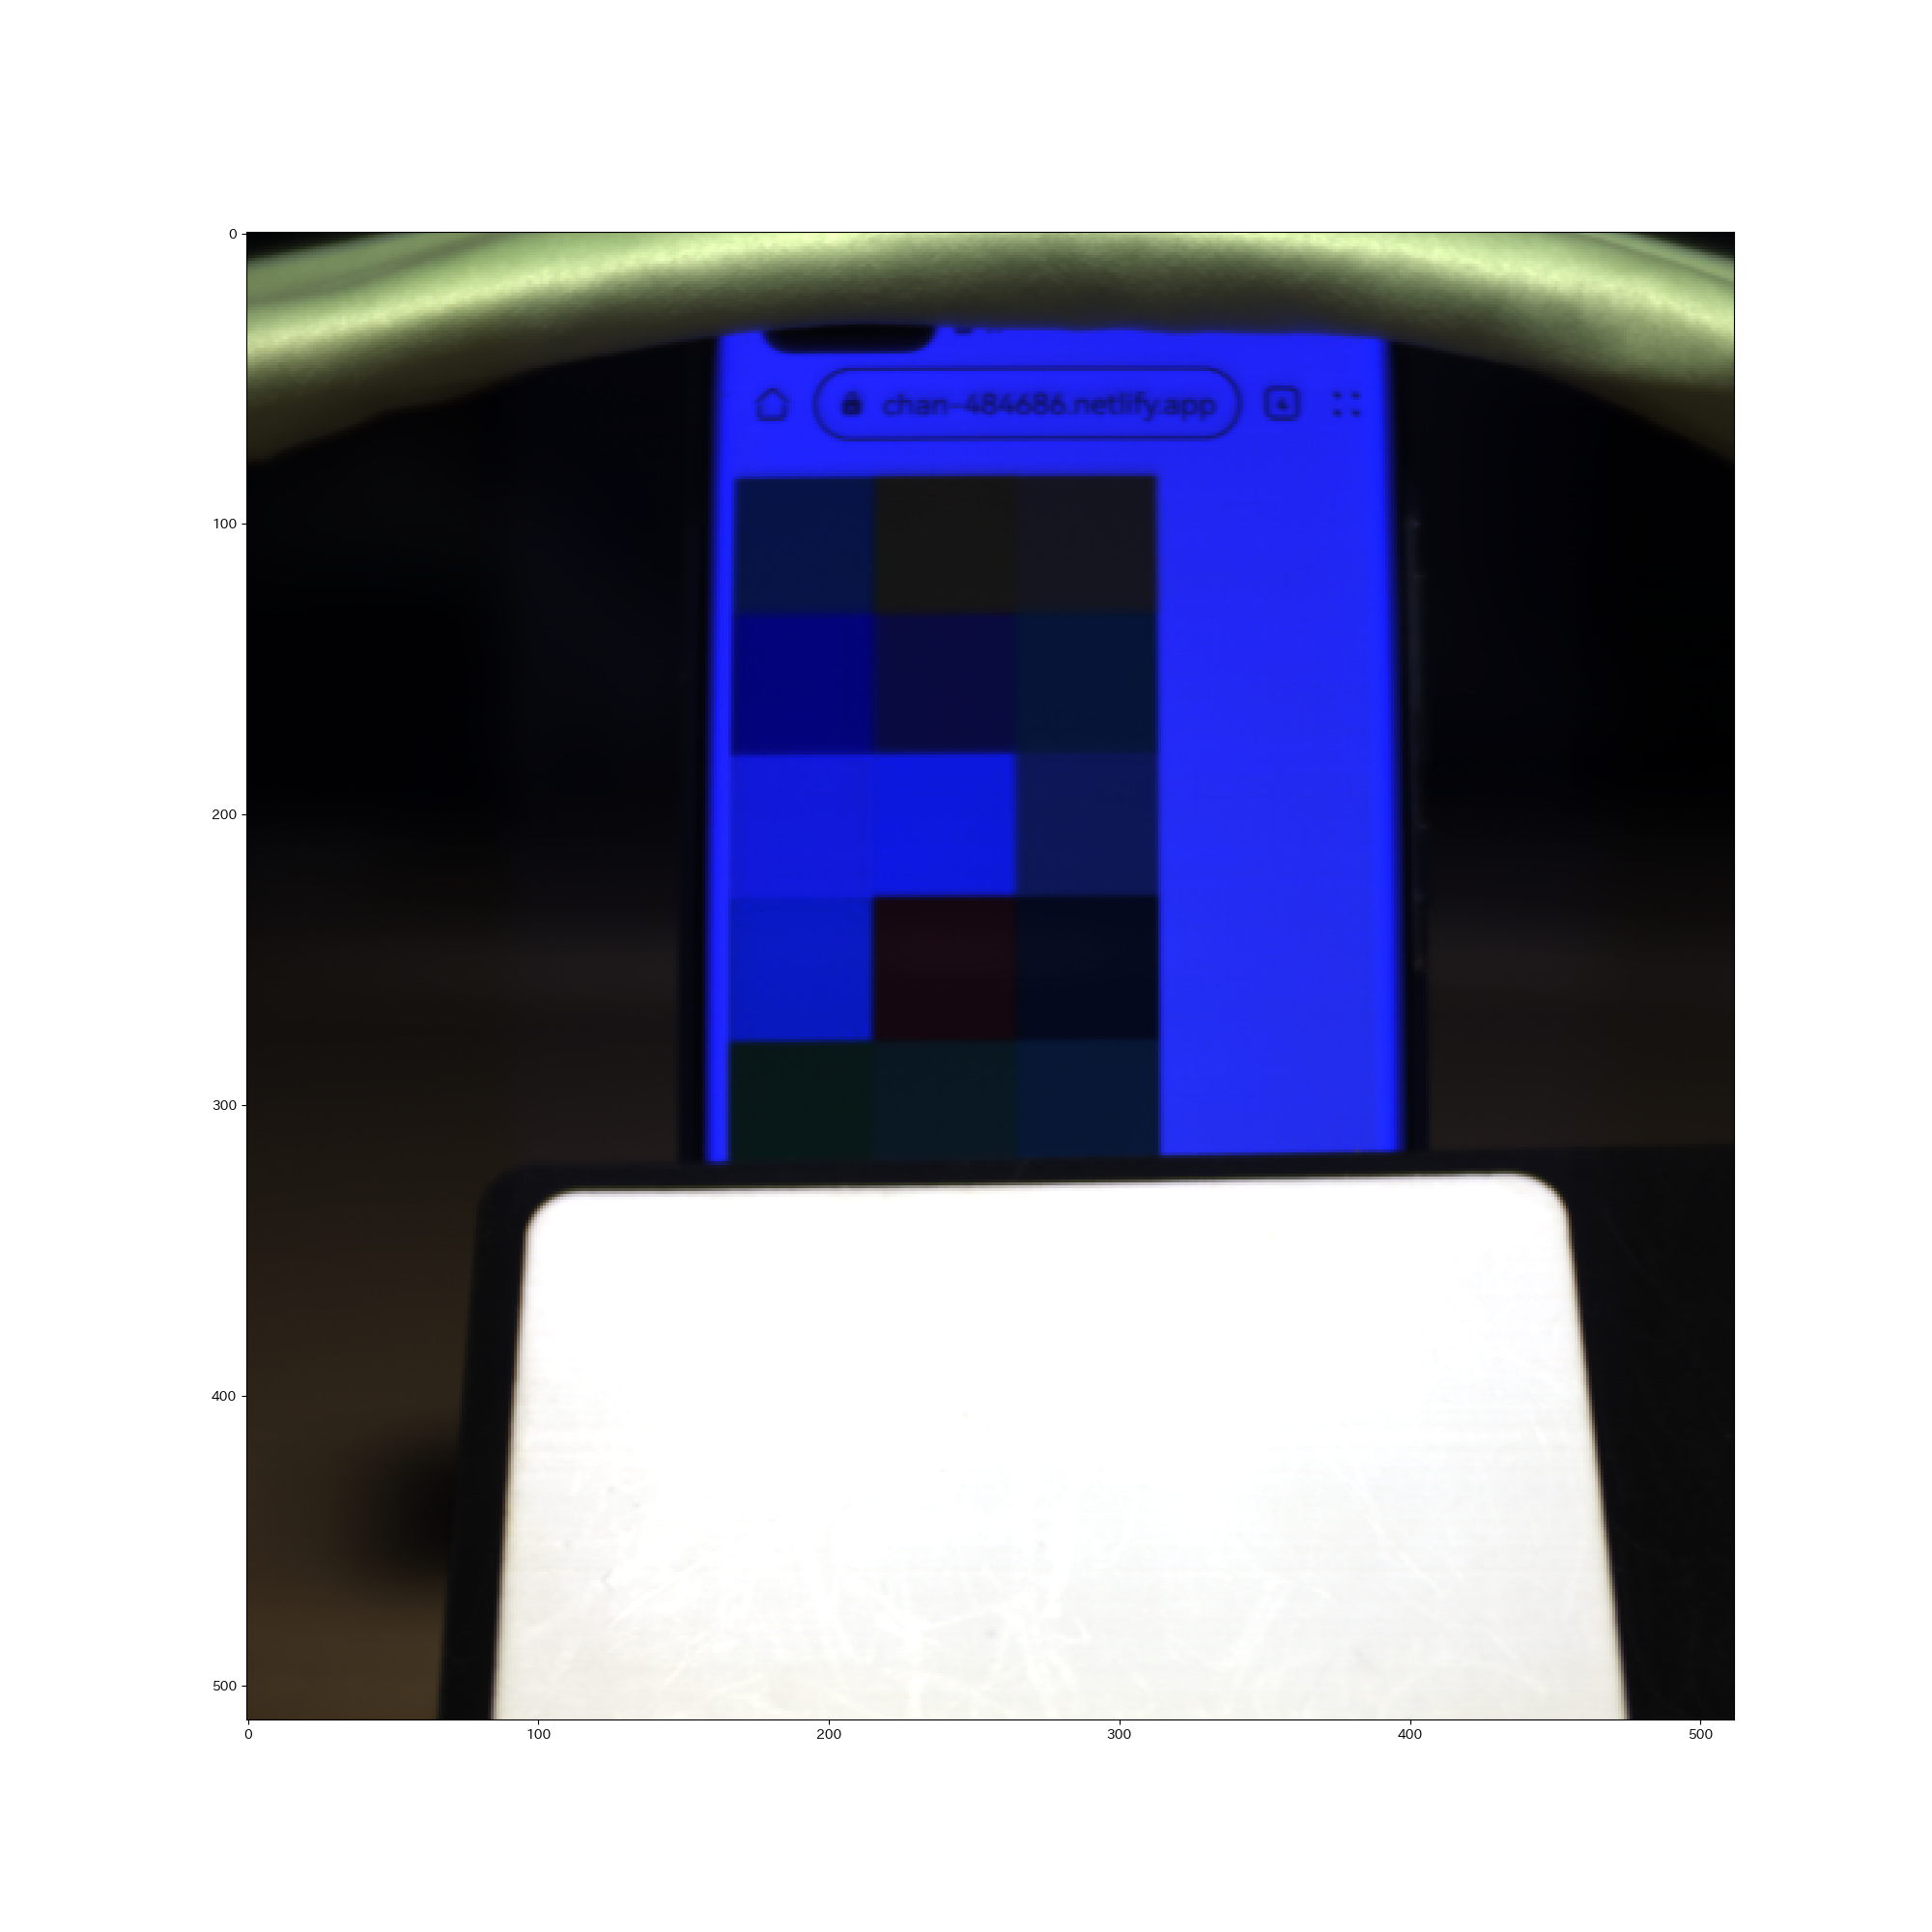

In [18]:
image_i = Image.open(IMG_PATH_huawei)
fig_test = plt.figure(figsize=(20,20))
_ax1 = fig_test.add_subplot(1,1,1)
_ax1.imshow(image_i)
mplcursors.cursor(hover=True)

plt.show()

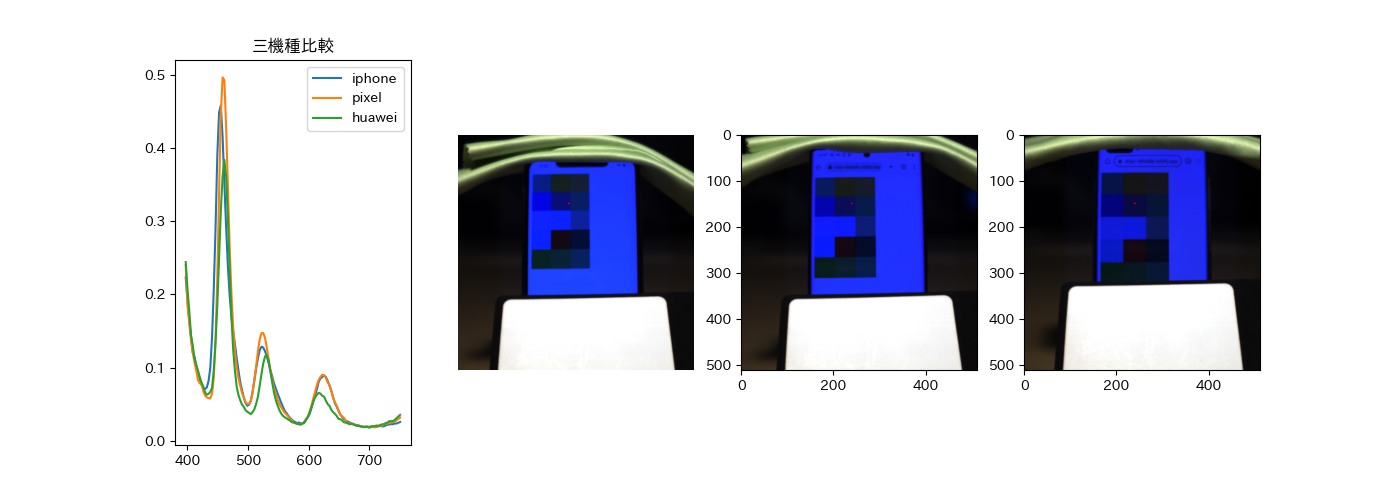

In [6]:
pixel_x = 240 # X座標
pixel_y = 150  # Y座標
color = (255, 0, 0)  # 色(RGB値)

dots=[-1,0,1]
image_i = Image.open(IMG_PATH_iphone)
for i in dots:
    for j in dots:
        image_i.putpixel((pixel_x+i, pixel_y+j), color)
        
image_p = Image.open(IMG_PATH_pixel)
for i in dots:
    for j in dots:
        image_p.putpixel((pixel_x+i, pixel_y+j), color)
image_h = Image.open(IMG_PATH_huawei)
for i in dots:
    for j in dots:
        image_h.putpixel((pixel_x+i, pixel_y+j), color)

x = wave_lengthes[:121]
y_i = spec_img_i.read_pixel(512-pixel_x,pixel_y)[:121]
y_p = spec_img_p.read_pixel(512-pixel_x,pixel_y)[:121]
y_h = spec_img_h.read_pixel(512-pixel_x,pixel_y)[:121]

fig = plt.figure(figsize = (14,5))
ax1 = fig.add_subplot(1,4,1)
ax2 = fig.add_subplot(1,4,2)
ax3 = fig.add_subplot(1,4,3)
ax4 = fig.add_subplot(1,4,4)


ax1.plot(x,y_i,label='iphone')
ax1.plot(x,y_p,label='pixel')
ax1.plot(x,y_h,label='huawei')
ax1.set_title('三機種比較')
ax1.legend()
ax2.imshow(image_i)
ax2.axis('off')
ax3.imshow(image_p)
ax4.imshow(image_h)
mplcursors.cursor(hover=True)

plt.show()

In [21]:
def correction_i(x,y):
    diff_mean_per_g = 0.009129828959703445
    diff_mean_per_r = 0.0045634925365448
    correction_value = 0
    new_x_coords = [162, 202, 242, 282]
    new_y_coords = [88, 127, 166, 208, 250, 290]

# 新しい grid_info
    grid_info = {
        (new_x_coords[0], new_x_coords[1], new_y_coords[0], new_y_coords[1]): int(41/50)*diff_mean_per_r + int(144/50)*diff_mean_per_g,
        (new_x_coords[1], new_x_coords[2], new_y_coords[0], new_y_coords[1]): int(228/50)*diff_mean_per_r + int(7/50)*diff_mean_per_g,
        (new_x_coords[2], new_x_coords[3], new_y_coords[0], new_y_coords[1]): int(219/50)*diff_mean_per_r + int(72/50)*diff_mean_per_g,
        
        (new_x_coords[0], new_x_coords[1], new_y_coords[1], new_y_coords[2]): int(3/50)*diff_mean_per_r + int(204/50)*diff_mean_per_g,
        (new_x_coords[1], new_x_coords[2], new_y_coords[1], new_y_coords[2]): int(139/50)*diff_mean_per_r + int(144/50)*diff_mean_per_g,
        (new_x_coords[2], new_x_coords[3], new_y_coords[1], new_y_coords[2]): int(14/50)*diff_mean_per_r + int(127/50)*diff_mean_per_g,
        
        (new_x_coords[0], new_x_coords[1], new_y_coords[2], new_y_coords[3]): int(178/50)*diff_mean_per_r + int(245/50)*diff_mean_per_g,
        (new_x_coords[1], new_x_coords[2], new_y_coords[2], new_y_coords[3]): int(127/50)*diff_mean_per_r + int(251/50)*diff_mean_per_g,
        (new_x_coords[2], new_x_coords[3], new_y_coords[2], new_y_coords[3]): int(152/50)*diff_mean_per_r + int(162/50)*diff_mean_per_g,
        
        (new_x_coords[0], new_x_coords[1], new_y_coords[3], new_y_coords[4]): int(61/50)*diff_mean_per_r + int(237/50)*diff_mean_per_g,
        (new_x_coords[1], new_x_coords[2], new_y_coords[3], new_y_coords[4]): int(242/50)*diff_mean_per_r + int(35/50)*diff_mean_per_g,
        (new_x_coords[2], new_x_coords[3], new_y_coords[3], new_y_coords[4]): int(31/50)*diff_mean_per_r + int(95/50)*diff_mean_per_g,
        
        (new_x_coords[0], new_x_coords[1], new_y_coords[4], new_y_coords[5]): int(71/50)*diff_mean_per_r + int(45/50)*diff_mean_per_g,
        (new_x_coords[1], new_x_coords[2], new_y_coords[4], new_y_coords[5]): int(95/50)*diff_mean_per_r + int(82/50)*diff_mean_per_g,
        (new_x_coords[2], new_x_coords[3], new_y_coords[4], new_y_coords[5]): int(22/50)*diff_mean_per_r + int(124/50)*diff_mean_per_g
    }

    for (x_min, x_max, y_min, y_max), value in grid_info.items():
        if (x_min < x and x < x_max and y_min < y and y < y_max) :
            correction_value = value
    
    return correction_value

In [22]:
def correction_p(x,y):
    diff_mean_per_g = 0.006255974620580673
    diff_mean_per_r = 0.002945086359977722
    correction_value = 0
    new_x_coords = [160, 203, 248, 289]
    new_y_coords = [95, 138, 179, 224, 267, 311]

# 新しい grid_info
    grid_info = {
        (new_x_coords[0], new_x_coords[1], new_y_coords[0], new_y_coords[1]): int(41/50)*diff_mean_per_r + int(144/50)*diff_mean_per_g,
        (new_x_coords[1], new_x_coords[2], new_y_coords[0], new_y_coords[1]): int(228/50)*diff_mean_per_r + int(7/50)*diff_mean_per_g,
        (new_x_coords[2], new_x_coords[3], new_y_coords[0], new_y_coords[1]): int(219/50)*diff_mean_per_r + int(72/50)*diff_mean_per_g,
        
        (new_x_coords[0], new_x_coords[1], new_y_coords[1], new_y_coords[2]): int(3/50)*diff_mean_per_r + int(204/50)*diff_mean_per_g,
        (new_x_coords[1], new_x_coords[2], new_y_coords[1], new_y_coords[2]): int(139/50)*diff_mean_per_r + int(144/50)*diff_mean_per_g,
        (new_x_coords[2], new_x_coords[3], new_y_coords[1], new_y_coords[2]): int(14/50)*diff_mean_per_r + int(127/50)*diff_mean_per_g,
        
        (new_x_coords[0], new_x_coords[1], new_y_coords[2], new_y_coords[3]): int(178/50)*diff_mean_per_r + int(245/50)*diff_mean_per_g,
        (new_x_coords[1], new_x_coords[2], new_y_coords[2], new_y_coords[3]): int(127/50)*diff_mean_per_r + int(251/50)*diff_mean_per_g,
        (new_x_coords[2], new_x_coords[3], new_y_coords[2], new_y_coords[3]): int(152/50)*diff_mean_per_r + int(162/50)*diff_mean_per_g,
        
        (new_x_coords[0], new_x_coords[1], new_y_coords[3], new_y_coords[4]): int(61/50)*diff_mean_per_r + int(237/50)*diff_mean_per_g,
        (new_x_coords[1], new_x_coords[2], new_y_coords[3], new_y_coords[4]): int(242/50)*diff_mean_per_r + int(35/50)*diff_mean_per_g,
        (new_x_coords[2], new_x_coords[3], new_y_coords[3], new_y_coords[4]): int(31/50)*diff_mean_per_r + int(95/50)*diff_mean_per_g,
        
        (new_x_coords[0], new_x_coords[1], new_y_coords[4], new_y_coords[5]): int(71/50)*diff_mean_per_r + int(45/50)*diff_mean_per_g,
        (new_x_coords[1], new_x_coords[2], new_y_coords[4], new_y_coords[5]): int(95/50)*diff_mean_per_r + int(82/50)*diff_mean_per_g,
        (new_x_coords[2], new_x_coords[3], new_y_coords[4], new_y_coords[5]): int(22/50)*diff_mean_per_r + int(124/50)*diff_mean_per_g
    }

    for (x_min, x_max, y_min, y_max), value in grid_info.items():
        if (x_min < x and x < x_max and y_min < y and y < y_max) :
            correction_value = value
    
    return correction_value

In [23]:
def correction_h(x,y):
    diff_mean_per_g = 0.0032721709460020064
    diff_mean_per_r = 0.009539151191711425
    correction_value = 0
    new_x_coords = [168, 214, 264, 312]
    new_y_coords = [85, 132, 180, 229, 277, 319]

# 新しい grid_info
    grid_info = {
        (new_x_coords[0], new_x_coords[1], new_y_coords[0], new_y_coords[1]): int(41/50)*diff_mean_per_r + int(144/50)*diff_mean_per_g,
        (new_x_coords[1], new_x_coords[2], new_y_coords[0], new_y_coords[1]): int(228/50)*diff_mean_per_r + int(7/50)*diff_mean_per_g,
        (new_x_coords[2], new_x_coords[3], new_y_coords[0], new_y_coords[1]): int(219/50)*diff_mean_per_r + int(72/50)*diff_mean_per_g,
        
        (new_x_coords[0], new_x_coords[1], new_y_coords[1], new_y_coords[2]): int(3/50)*diff_mean_per_r + int(204/50)*diff_mean_per_g,
        (new_x_coords[1], new_x_coords[2], new_y_coords[1], new_y_coords[2]): int(139/50)*diff_mean_per_r + int(144/50)*diff_mean_per_g,
        (new_x_coords[2], new_x_coords[3], new_y_coords[1], new_y_coords[2]): int(14/50)*diff_mean_per_r + int(127/50)*diff_mean_per_g,
        
        (new_x_coords[0], new_x_coords[1], new_y_coords[2], new_y_coords[3]): int(178/50)*diff_mean_per_r + int(245/50)*diff_mean_per_g,
        (new_x_coords[1], new_x_coords[2], new_y_coords[2], new_y_coords[3]): int(127/50)*diff_mean_per_r + int(251/50)*diff_mean_per_g,
        (new_x_coords[2], new_x_coords[3], new_y_coords[2], new_y_coords[3]): int(152/50)*diff_mean_per_r + int(162/50)*diff_mean_per_g,
        
        (new_x_coords[0], new_x_coords[1], new_y_coords[3], new_y_coords[4]): int(61/50)*diff_mean_per_r + int(237/50)*diff_mean_per_g,
        (new_x_coords[1], new_x_coords[2], new_y_coords[3], new_y_coords[4]): int(242/50)*diff_mean_per_r + int(35/50)*diff_mean_per_g,
        (new_x_coords[2], new_x_coords[3], new_y_coords[3], new_y_coords[4]): int(31/50)*diff_mean_per_r + int(95/50)*diff_mean_per_g,
        
        (new_x_coords[0], new_x_coords[1], new_y_coords[4], new_y_coords[5]): int(71/50)*diff_mean_per_r + int(45/50)*diff_mean_per_g,
        (new_x_coords[1], new_x_coords[2], new_y_coords[4], new_y_coords[5]): int(95/50)*diff_mean_per_r + int(82/50)*diff_mean_per_g,
        (new_x_coords[2], new_x_coords[3], new_y_coords[4], new_y_coords[5]): int(22/50)*diff_mean_per_r + int(124/50)*diff_mean_per_g
    }

    for (x_min, x_max, y_min, y_max), value in grid_info.items():
        if (x_min < x and x < x_max and y_min < y and y < y_max) :
            correction_value = value
    
    return correction_value

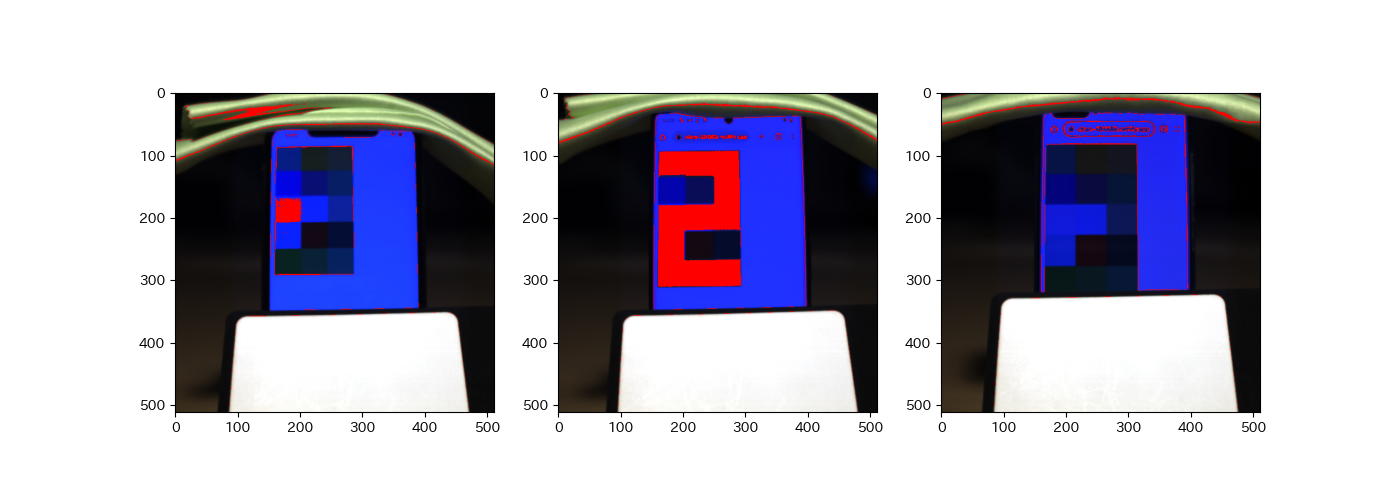

In [7]:
color = (255,0,0)
image_i = Image.open(IMG_PATH_iphone)
std = 0.038
base = 0.373
LOWER = base - std 
UPPER = base + std

for i in range(512):
    for j in range(512):
        green_i = spec_img_i.read_pixel(511-i,j)[43]
        if LOWER < green_i and green_i < UPPER:
            image_i.putpixel((i, j), color)
            
image_p = Image.open(IMG_PATH_pixel)
for i in range(512):
    for j in range(512):
        green_p = spec_img_p.read_pixel(511-i,j)[43]
        if LOWER < green_p and green_p < UPPER:
            image_p.putpixel((i, j), color)
            

image_h = Image.open(IMG_PATH_huawei)
for i in range(512):
    for j in range(512):
        green_h = spec_img_h.read_pixel(511-i,j)[43]
        if LOWER < green_h and green_h < UPPER:
            image_h.putpixel((i, j), color)
            
fig2 = plt.figure(figsize = (14,5))
_ax1 = fig2.add_subplot(1,3,1)
_ax2 = fig2.add_subplot(1,3,2)
_ax3 = fig2.add_subplot(1,3,3)

_ax1.imshow(image_i)
_ax2.imshow(image_p)
_ax3.imshow(image_h)
plt.show()

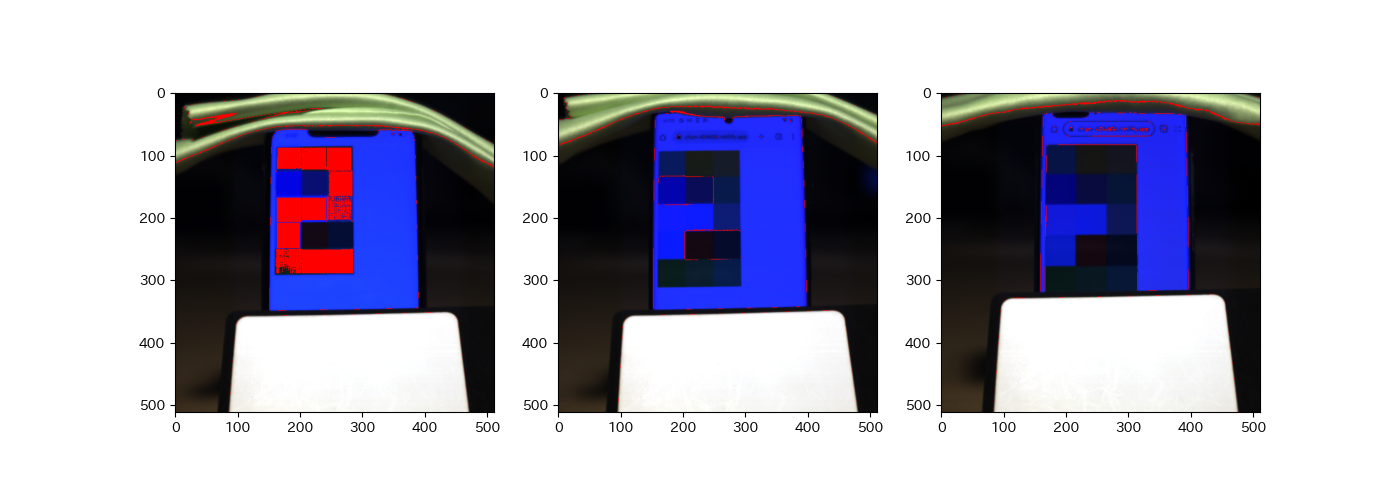

In [25]:
color = (255,0,0)

std = 0.02
base = 0.283
LOWER = base - std 
UPPER = base + std


image_i = Image.open(IMG_PATH_iphone)
for i in range(512):
    for j in range(512):
        correction_value = correction_i(i,j)
        green_i = spec_img_i.read_pixel(511-i,j)[43]
        green_i -= correction_value
        if LOWER < green_i and green_i < UPPER:
            image_i.putpixel((i, j), color)
            
image_p = Image.open(IMG_PATH_pixel)
for i in range(512):
    for j in range(512):
        correction_value = correction_p(i,j)
        green_p = spec_img_p.read_pixel(511-i,j)[43]
        green_p -= correction_value
        if LOWER < green_p and green_p < UPPER:
            image_p.putpixel((i, j), color)
            

image_h = Image.open(IMG_PATH_huawei)
for i in range(512):
    for j in range(512):
        correction_value = correction_h(i,j)
        green_h = spec_img_h.read_pixel(511-i,j)[43]
        green_h -= correction_value
        if LOWER < green_h and green_h < UPPER:
            image_h.putpixel((i, j), color)
            
fig2 = plt.figure(figsize = (14,5))
_ax1 = fig2.add_subplot(1,3,1)
_ax2 = fig2.add_subplot(1,3,2)
_ax3 = fig2.add_subplot(1,3,3)

_ax1.imshow(image_i)
_ax2.imshow(image_p)
_ax3.imshow(image_h)
plt.show()

In [8]:
ex_max_i=argrelmax(y_i,order=3)
ex_max_p = argrelmax(y_p,order=3)
ex_max_h = argrelmax(y_h,order=3)
print(ex_max_i,ex_max_p,ex_max_h)

(array([ 20,  43,  78, 108]),) (array([ 21,  44,  77, 102]),) (array([22, 46, 75]),)


In [9]:
ex_max_i[0][0]

20

In [10]:
for elem in ex_max_i[0]:
    print(y_i[elem])

0.45813954
0.1284029
0.089088395
0.020554494


In [11]:
for i in ex_max_p[0]:
    print(y_p[i])

0.4962963
0.14717542
0.090205185
0.019422075


In [12]:
for i in ex_max_h[0]:
    print(y_h[i])

0.3839038
0.11619985
0.065397605


In [13]:
0.617

0.617